In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dataset = pd.read_csv('ENB2012_data.csv')
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [24]:
X = dataset.ix[:,'X1':'X8']
y = dataset.ix[:,'Y1':'Y2']
X.head()

/home/samuel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/samuel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [25]:
y.head()

8.859467030568284

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predicts = lin_reg.predict(X_test)

In [183]:
def plotPredicts(X_test, y_test, y_predicts, result_col):
    # Plot outputs
    # print((x_vals[0].shape, y_test[0].shape))
    num_of_features = X_test.shape[1]
    plt.subplots(figsize=(15,num_of_features*5))
    
    index = 1
    for col in range(0, num_of_features):
        plt.subplot(num_of_features, 2, index).set_title("Real Y" + str(result_col + 1) + 
                                                         " values for X" + str(col + 1))
        plt.scatter(X_test[:, col], y_test[:, 0], color='black')
        index+=1
        
        plt.subplot(num_of_features, 2, index).set_title("Predicted Y" + str(result_col + 1) + 
                                                         " values for X" + str(col + 1))
        plt.scatter(X_test[:, col], y_predicts[:, 0], color='blue')
        index+=1
    
    plt.show()

8.859467030568284

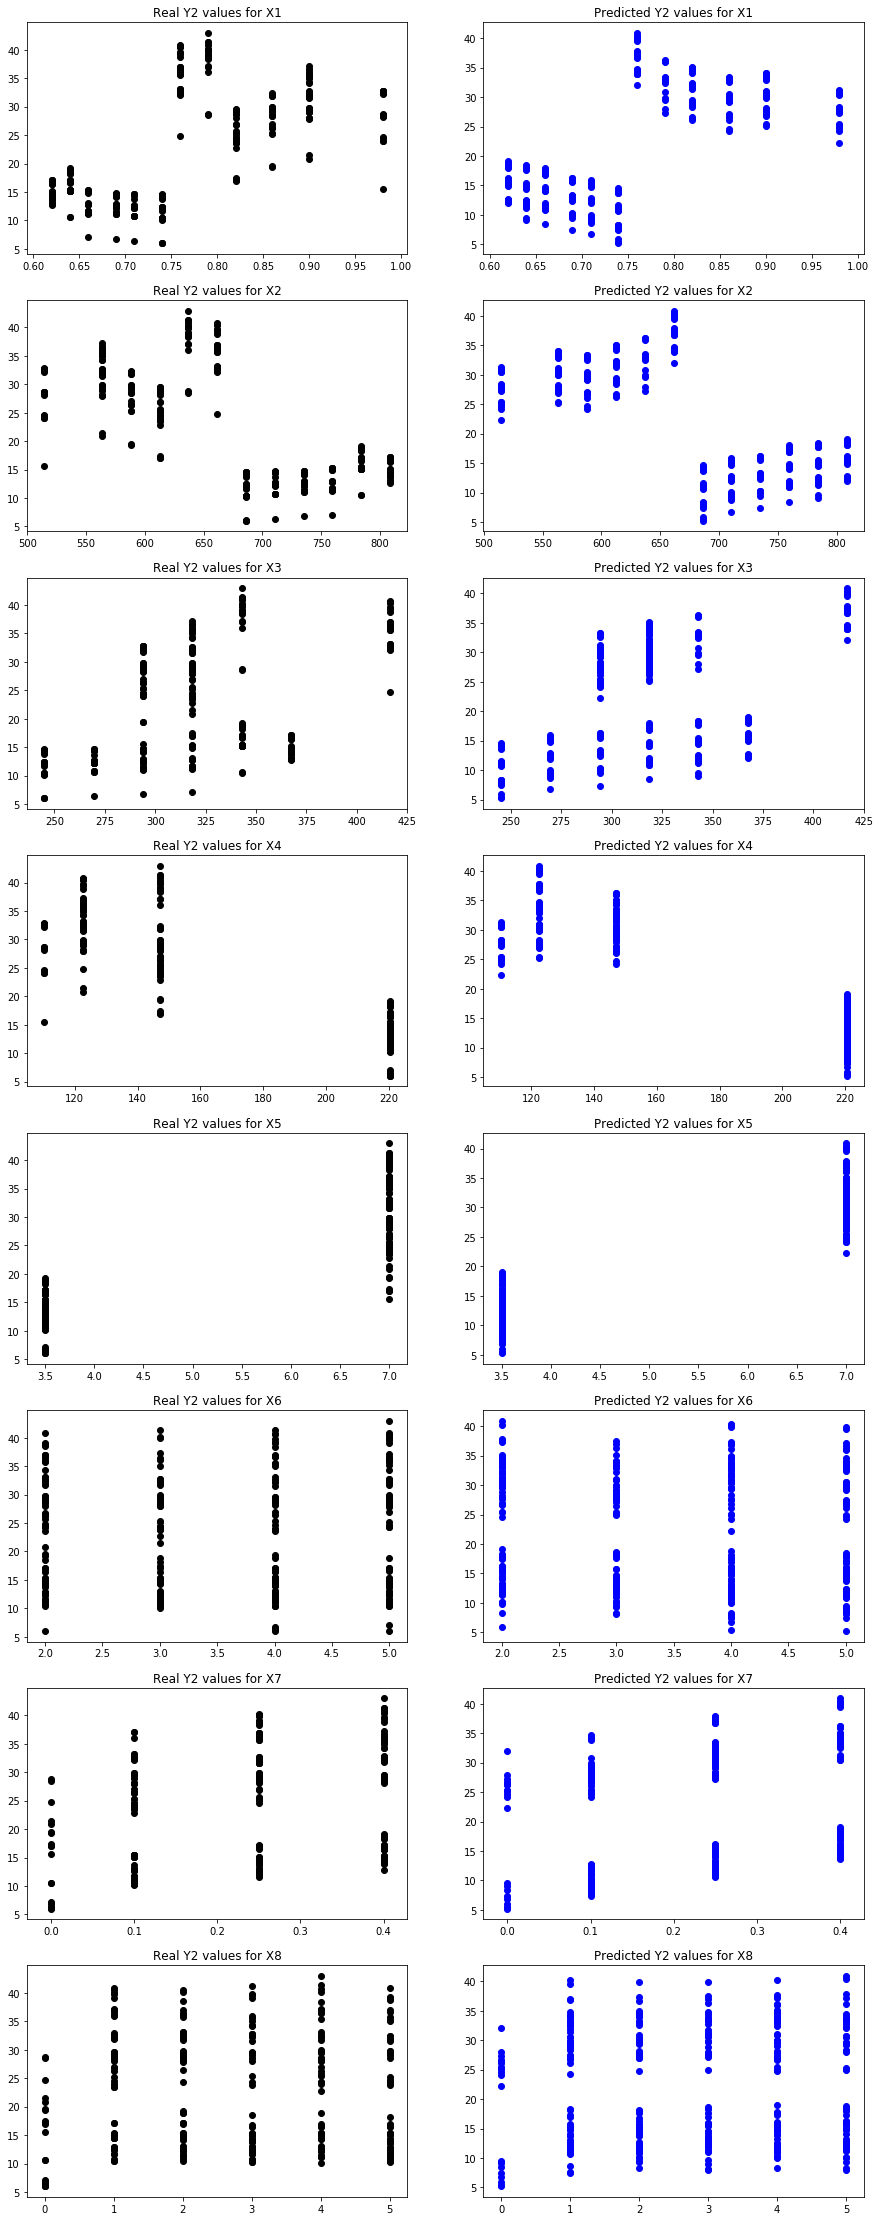

In [219]:
plotPredicts(X_test.values, y_test.values, y_predicts, 1)


In [46]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
y_minmax = min_max_scaler.fit_transform(y)


0.8828843644741895

In [239]:
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X, y, cv=5)
scores.mean()
# import sklearn
# sklearn.metrics.SCORERS.keys()

0.8833253187266527

In [240]:
scores = cross_val_score(lin_reg, X_minmax, y_minmax, cv=5)
scores.mean()


0.88338157366928

In [244]:
from sklearn.linear_model import Ridge, SGDRegressor, Lasso
reg = Ridge(alpha=0.1)
scores = cross_val_score(reg, X, y, cv=3)
scores.mean()


0.8702800425889342

In [257]:
reg = Lasso(alpha=0.5)
scores = cross_val_score(reg, X, y, cv=3)
scores.mean()

0.7272511776962761

In [265]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
scores = cross_val_score(reg, X, y, cv=4)
scores.mean()

/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/samuel/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9546261298840958